# Unsupervised learning

## Import essential libraries.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')


## Data Exploration

In [5]:
df = pd.read_csv(r"C:\Users\Hotu Ram\OneDrive\Desktop\python\Unsupervised ML\costomer_segmentation\data\data_fs.csv")

In [4]:
df.head()

Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  
0           1169         6             radio/TV  
1           5951        48             radio/TV  
2           2096        12            education  
3           7882        42  furniture/equipment  
4           4870        24                  car

In [6]:
df.drop(["Unnamed: 0"],axis=1, inplace=True)
# Droping the CostomerID

In [7]:
df.head()

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  
0         6             radio/TV  
1        48             radio/TV  
2        12            education  
3        42  furniture/equipment  
4        24                  car

In [9]:
titles = list(df.columns)
titles

['Age',
 'Sex',
 'Job',
 'Housing',
 'Saving accounts',
 'Checking account',
 'Credit amount',
 'Duration',
 'Purpose']

In [16]:
titles[0],titles[8] = titles[8],titles[0]
titles[2],titles[5] = titles[5],titles[2]
# titles[5],titles[8] = titles[8],titles[5]
titles

['Purpose',
 'Sex',
 'Checking account',
 'Housing',
 'Saving accounts',
 'Job',
 'Credit amount',
 'Duration',
 'Age']

In [17]:
df = df[titles]
df

Purpose     Sex Checking account Housing Saving accounts  \
0               radio/TV    male           little     own             NaN   
1               radio/TV  female         moderate     own          little   
2              education    male              NaN     own          little   
3    furniture/equipment    male           little    free          little   
4                    car    male           little    free          little   
..                   ...     ...              ...     ...             ...   
995  furniture/equipment  female              NaN     own          little   
996                  car    male           little     own          little   
997             radio/TV    male              NaN     own          little   
998             radio/TV    male           little    free          little   
999                  car    male         moderate     own        moderate   

     Job  Credit amount  Duration  Age  
0      2           1169         6   67  
1      2           5951        48   22  
2      1           2096        12   49  
3      2           7882        42   45  
4      2           4870        24   53  
..   ...            ...       ...  ...  
995    1           1736        12   31  
996    3           3857        30   40  
997    2            804        12   38  
998    2           1845        45   23  
999    2           4576        45   27  

[1000 rows x 9 columns]

In [18]:
df.shape

(1000, 9)

## Missing values

In [21]:
df.dtypes

Purpose             object
Sex                 object
Checking account    object
Housing             object
Saving accounts     object
Job                  int64
Credit amount        int64
Duration             int64
Age                  int64
dtype: object

<AxesSubplot:>

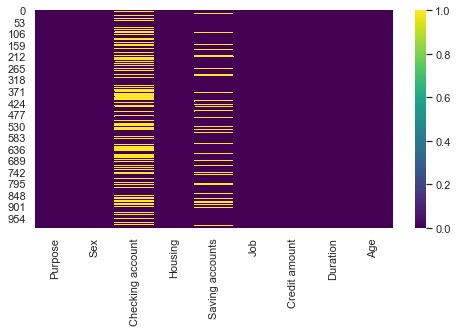

In [84]:
df.isnull().sum()
sns.set(rc={'figure.figsize':(8,4)})
sns.heatmap(df.isnull(),cmap='viridis')

 In this we can see here we have null 40% null value in Checking accounts and 20% null values in the Saving accounts.

In [23]:
df.head()

Purpose     Sex Checking account Housing Saving accounts  Job  \
0             radio/TV    male           little     own             NaN    2   
1             radio/TV  female         moderate     own          little    2   
2            education    male              NaN     own          little    1   
3  furniture/equipment    male           little    free          little    2   
4                  car    male           little    free          little    2   

   Credit amount  Duration  Age  
0           1169         6   67  
1           5951        48   22  
2           2096        12   49  
3           7882        42   45  
4           4870        24   53

## Data visualisation and analysis thoughts with plots.

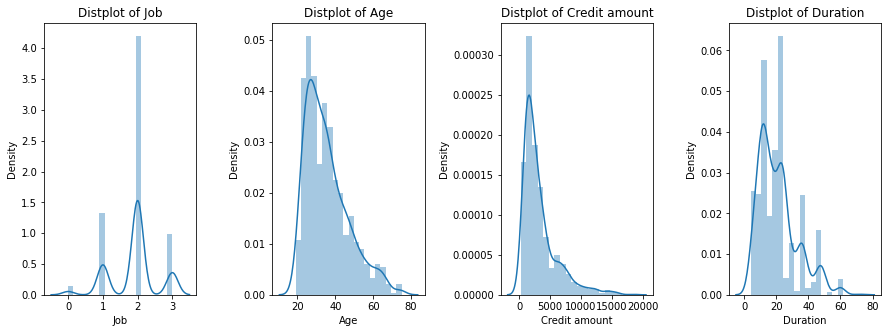

In [27]:
plt.figure(1, figsize=(15,5))
n=0
for x in [ 'Job', 'Age', 'Credit amount', 'Duration']:
    n += 1
    plt.subplot(1, 4, n)
    plt.subplots_adjust(hspace =0.5, wspace =0.5)
    sns.distplot(df[x], bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

Plot wise (Left to Right)               
1. mejority of customers have 2 type of job         
2. maximum costomers age lies between 20-40.         
3. majority of costomers have Credit amount lies between 0-5000.                
4. majority of costomers Duration period lies between 0-20.         


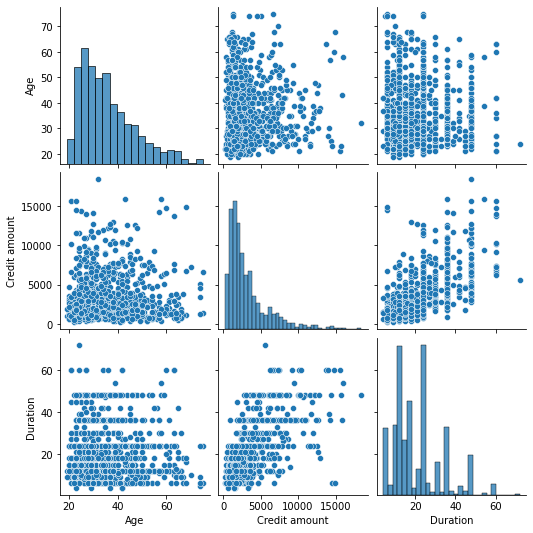

In [6]:
sns.pairplot(df[['Age','Credit amount', 'Duration']])


1. As we in plot between credit amount and Duretion as duration increses the credit ammount is also increses.
2. In plot between credit amount and Age majority of people lies in below 5000 credit amount regardless of their Age.

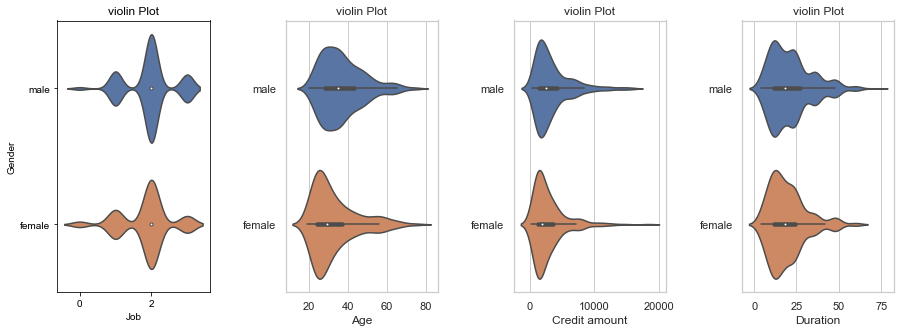

In [8]:
plt.figure(1, figsize=(15,5))
n=0
for cols in ['Job', 'Age', 'Credit amount', 'Duration']:
    n += 1
    plt.subplot(1, 4, n)
    sns.set(style="whitegrid")
    plt.subplots_adjust(hspace =0.5, wspace =0.5)
    sns.violinplot(x = cols , y = "Sex", data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('violin Plot' )
plt.show()

plotwise (Left to Right)            
1.Type  2 - skilled job have more male customers than female.     
2. In age range 25-31 female costomers are more compare to male.        
3. Both male and female have similar Credit amounts.            
4. Female costomers have more duretion than male in range 10-20.            

<AxesSubplot:>

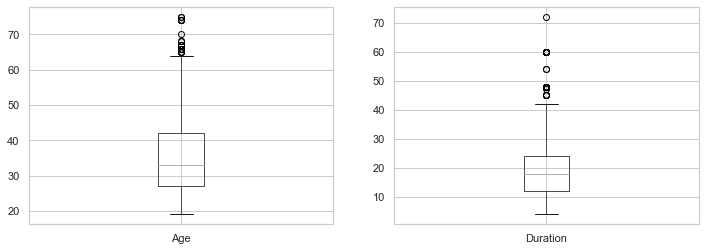

In [9]:
r,c=1,2
plt.figure(figsize=(12,4))
plt.subplot(r,c,1)
df.boxplot(['Age'])

plt.subplot(r,c,2)
df.boxplot(['Duration'])


In Age plot their are outliers point data after 65, it shows very unusual behavier of data,             
also in Duration plot  we show outliers above 40,

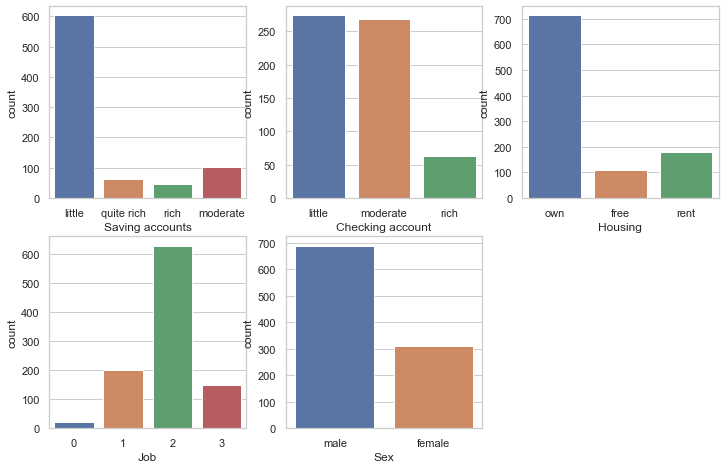

In [10]:
plt.figure(figsize=(12,12))
r,c=3,3
plt.subplot(r,c,1)
sns.countplot(df['Saving accounts']);

plt.subplot(r,c,2)
sns.countplot(df['Checking account']);

plt.subplot(r,c,3)
sns.countplot(df['Housing']);

plt.subplot(r,c,4)
sns.countplot(df['Job']);

plt.subplot(r,c,5)
sns.countplot(df['Sex']);

As we see in above plots.    
1. In saving accounts plot we clearly see that 60% people have little type saving accounts and If we want to target       majority of people than we have to make a plan for people who have little type of saving accounts.    
2. In checking account plot, liitle and moderate have almost equal 26% watege.    
3. In Housing we see that 70% people have there own house.    
4. In job plot we see that categary 2 have more than 60% of people      
5. In sex plot we see that almost 70% of people are maale.      
   



## Unsupervised classification
By using Kmeans

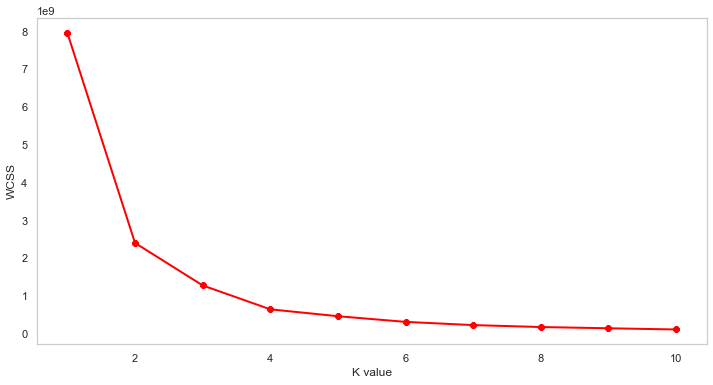

In [33]:
x1 = df.loc[:,['Age' , 'Credit amount']].values

from sklearn.cluster import KMeans
wcss =[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker = '8')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.show()



In above plot between Age and Credit amount,            
if we compare to Elbow method plot we find that we have two optimum number of clusters (k=2)

In [34]:
kmeans =  KMeans(n_clusters=2)

label = kmeans.fit_predict(x1)

print(label)

[0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0
 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 

In [35]:
print(kmeans.cluster_centers_)

[[  35.29262394 2193.30592503]
 [  36.75722543 8424.24277457]]


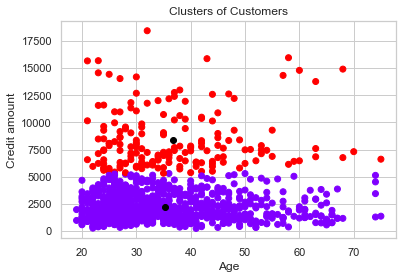

In [36]:
plt.scatter(x1[:,0], x1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Credit amount')
plt.show()

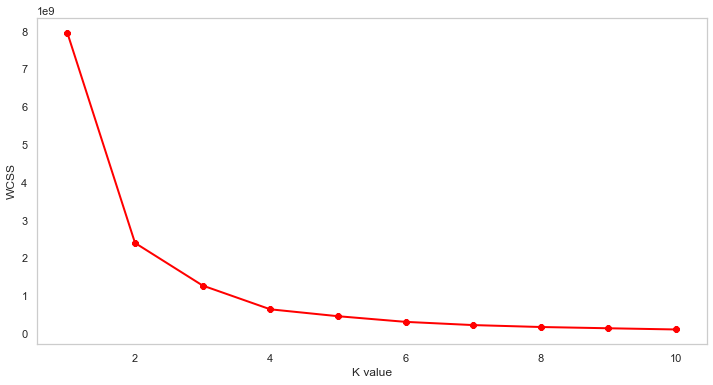

In [37]:
x2 = df.loc[:,['Duration' , 'Credit amount']].values

from sklearn.cluster import KMeans
wcss =[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker = '8')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.show()


In above plot between Duration and Cedit amount,            
if we compare to Elbow method plot we find that we have two optimum number of clusters (k=2)

In [38]:
kmeans =  KMeans(n_clusters=2)

label = kmeans.fit_predict(x2)

print(label)

[0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0
 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 

In [39]:
print(kmeans.cluster_centers_)

[[  17.97097944 2193.30592503]
 [  34.91907514 8424.24277457]]


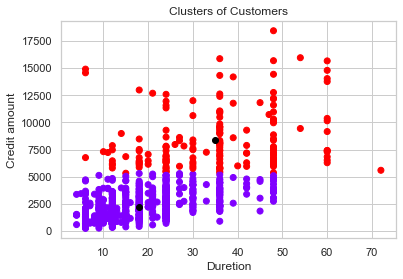

In [41]:
plt.scatter(x2[:,0], x1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of Customers')
plt.xlabel('Duretion')
plt.ylabel('Credit amount')
plt.show()

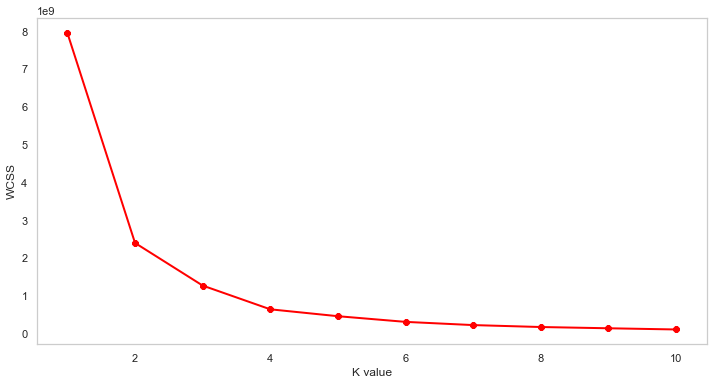

In [47]:
x3 = df.loc[:,['Job' , 'Credit amount']].values

from sklearn.cluster import KMeans
wcss =[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker = '8')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.show()

In above plot between Job and Credit amount,            
if we compare to Elbow method plot we find that we have two optimum number of clusters (k=2)

In [48]:
kmeans =  KMeans(n_clusters=2)

label = kmeans.fit_predict(x3)

print(label)

[0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1
 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 0
 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 

In [49]:
print(kmeans.cluster_centers_)


[[1.83555018e+00 2.19330593e+03]
 [2.23121387e+00 8.42424277e+03]]


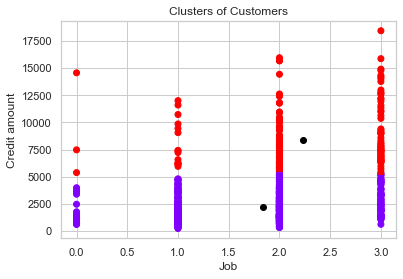

In [51]:
plt.scatter(x3[:,0], x1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of Customers')
plt.xlabel('Job')
plt.ylabel('Credit amount')
plt.show()

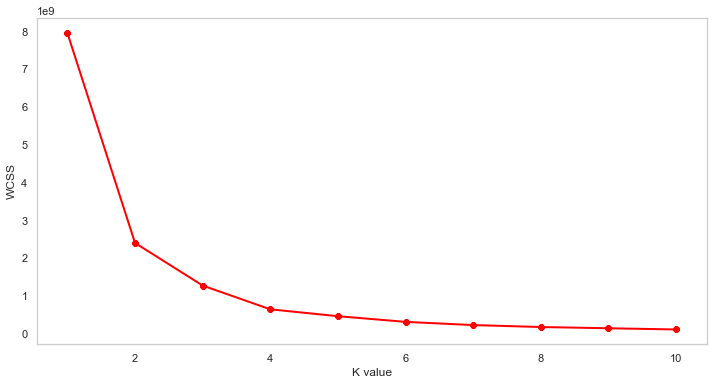

In [45]:
x4 = df.iloc[:,5:]
wcss =[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(x4)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker = '8')
plt.xlabel('K value')
plt.ylabel('WCSS')
plt.show()

In [76]:
kmeans =  KMeans(n_clusters=2)
kmeans= kmeans.fit(x4)
kmeans.predict(x4)

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,

K means